Hasil Produksi Fuzzy Tsukamoto: 2000.00


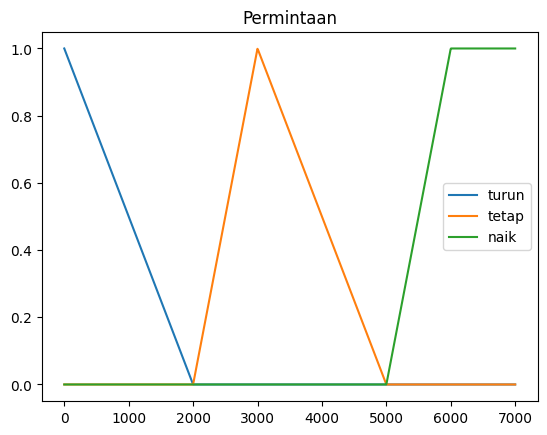

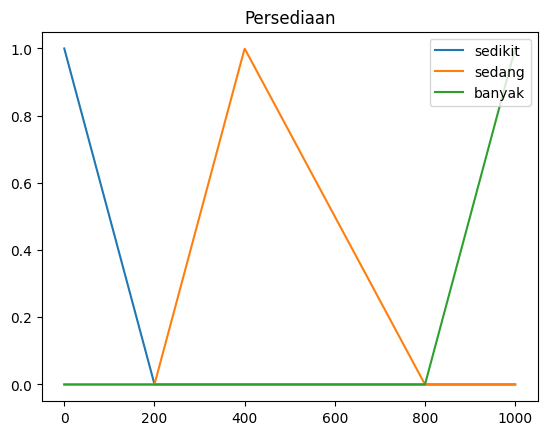

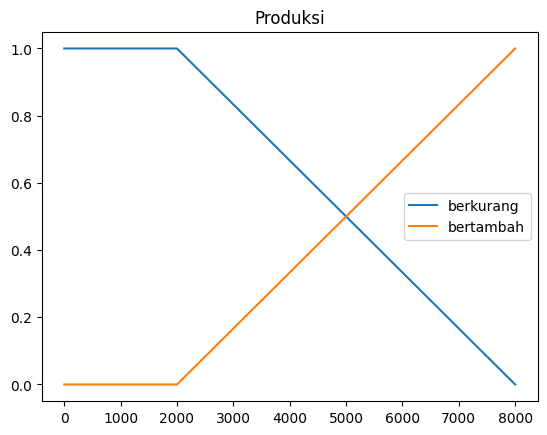

In [4]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt

def turun(x, a=0, b=2000):
    return np.maximum(0, np.minimum(1, (b - x) / (b - a)))

def tetap(x, a=2000, b=3000, c=5000):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

def naik(x, a=5000, b=6000):
    return np.maximum(0, np.minimum(1, (x - a) / (b - a)))

def sedikit(x, a=0, b=200):
    return np.maximum(0, np.minimum(1, (b - x) / (b - a)))

def sedang(x, a=200, b=400, c=800):
    return np.maximum(0, np.minimum((x - a) / (b - a), (c - x) / (c - b)))

def banyak(x, a=800, b=1000):
    return np.maximum(0, np.minimum(1, (x - a) / (b - a)))

def berkurang(z, a=2000, b=8000):
    return np.maximum(0, np.minimum(1, (b - z) / (b - a)))

def bertambah(z, a=2000, b=8000):
    return np.maximum(0, np.minimum(1, (z - a) / (b - a)))

def tsukamoto_inference(permintaan, persediaan):
    # Fuzzy Membership
    permintaan_turun = turun(permintaan)
    permintaan_tetap = tetap(permintaan)
    permintaan_naik = naik(permintaan)
    
    persediaan_sedikit = sedikit(persediaan)
    persediaan_sedang = sedang(persediaan)
    persediaan_banyak = banyak(persediaan)
    
    # Aturan Fuzzy
    rule1 = min(permintaan_turun, persediaan_sedikit)
    z1 = 8000  # bertambah
    
    rule2 = min(permintaan_turun, persediaan_sedang)
    z2 = 2000  # berkurang
    
    rule3 = min(permintaan_turun, persediaan_banyak)
    z3 = 2000  # berkurang
    
    rule4 = min(permintaan_tetap, persediaan_sedikit)
    z4 = 8000  # bertambah
    
    rule5 = min(permintaan_tetap, persediaan_sedang)
    z5 = 2000  # berkurang
    
    rule6 = min(permintaan_tetap, persediaan_banyak)
    z6 = 2000  # berkurang
    
    rule7 = min(permintaan_naik, persediaan_sedikit)
    z7 = 8000  # bertambah
    
    rule8 = min(permintaan_naik, persediaan_sedang)
    z8 = 8000  # bertambah
    
    rule9 = min(permintaan_naik, persediaan_banyak)
    z9 = 2000  # berkurang

    # Menghitung defuzzifikasi (Weighted Average)
    numerator = (rule1*z1 + rule2*z2 + rule3*z3 + rule4*z4 + rule5*z5 +
                 rule6*z6 + rule7*z7 + rule8*z8 + rule9*z9)
    denominator = (rule1 + rule2 + rule3 + rule4 + rule5 +
                   rule6 + rule7 + rule8 + rule9)
    
    if denominator == 0:
        return 0
    
    z_final = numerator / denominator
    return z_final

# Contoh Input
permintaan = 2500  # Input Permintaan
persediaan = 300   # Input Persediaan

# Hitung Inferensi
produksi = tsukamoto_inference(permintaan, persediaan)

# Output
print(f"Hasil Produksi Fuzzy Tsukamoto: {produksi:.2f}")

# Visualisasi Fungsi Keanggotaan Permintaan
x = np.linspace(0, 7000, 1000)
plt.plot(x, [turun(i) for i in x], label='turun')
plt.plot(x, [tetap(i) for i in x], label='tetap')
plt.plot(x, [naik(i) for i in x], label='naik')
plt.title('Permintaan')
plt.legend()
plt.show()

# Visualisasi Fungsi Keanggotaan Persediaan
x = np.linspace(0, 1000, 1000)
plt.plot(x, [sedikit(i) for i in x], label='sedikit')
plt.plot(x, [sedang(i) for i in x], label='sedang')
plt.plot(x, [banyak(i) for i in x], label='banyak')
plt.title('Persediaan')
plt.legend()
plt.show()

# Visualisasi Fungsi Keanggotaan Produksi
z = np.linspace(0, 8000, 1000)
plt.plot(z, [berkurang(i) for i in z], label='berkurang')
plt.plot(z, [bertambah(i) for i in z], label='bertambah')
plt.title('Produksi')
plt.legend()
plt.show()
